In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install ipywidgets

In [3]:
# Import necessary libraries
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import io
import ipywidgets as widgets


# Introduction
This lab is designed to introduce you to the basics of deep learning by interacting with a pre-built model. You'll understand the workflow of a deep learning project, including data preprocessing, model architecture, and making predictions. The goal is to familiarize yourself with the basics of deep learning without writing any code.


In [4]:
# Load the VGG16 model
model = VGG16(weights='imagenet')

# Display the model architecture
model.summary()


2025-01-29 17:03:19.680538: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


553467096/553467096 [==============================] - 9s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [11]:
from tensorflow.keras.utils import get_file
sample_path = get_file(
    'elephant.jpg',
    'https://storage.googleapis.com/tensorflow/keras-applications/tests/elephant.jpg'
)


251780/251780 [==============================] - 0s 0us/step


In [12]:
# Load and preprocess an image
def load_and_preprocess_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(224, 224))

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Expand dimensions to fit the model input
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image
    img_array = preprocess_input(img_array)

    return img, img_array

# Load and preprocess a sample image
sample_image, processed_image = load_and_preprocess_image('sample.jpg')

# Display the sample image
plt.imshow(sample_image)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'sample.jpg'

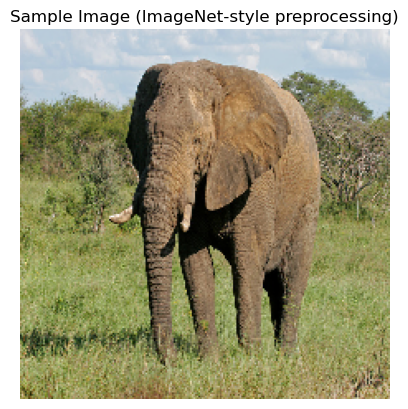


Preprocessing Steps:
1. Resize to 224x224
2. Convert to array
3. Apply channel-wise mean subtraction



In [13]:
# Modified Activity 3 cell (Data Loading)
from tensorflow.keras.utils import load_img

# Sample image from Keras test assets
sample_url = 'https://storage.googleapis.com/tensorflow/keras-applications/tests/elephant.jpg'
sample_path = get_file(origin=sample_url)

# Preprocess and display
img = load_img(sample_path, target_size=(224, 224))
plt.imshow(img)
plt.title("Sample Image (ImageNet-style preprocessing)")
plt.axis('off')
plt.show()

# Show preprocessing steps
print("""
Preprocessing Steps:
1. Resize to 224x224
2. Convert to array
3. Apply channel-wise mean subtraction
""")

In [17]:
# Make predictions
predictions = model.predict(img)

# Decode and print the predictions
decoded_predictions = decode_predictions(predictions, top=3)[0]
print(decoded_predictions)


ValueError: Failed to find data adapter that can handle input: <class 'PIL.Image.Image'>, <class 'NoneType'>

In [16]:
# Upload button to load images
upload = widgets.FileUpload()
display(upload)

# Button to make predictions
predict_button = widgets.Button(description="Make Prediction")
display(predict_button)

# Function to handle button click
def on_click(change):
    img_data = list(upload.value.values())[0]['content']
    img = Image.open(io.BytesIO(img_data))
    img = img.resize((224, 224))
    
    # Preprocess and predict
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    
    # Display predictions
    print(decoded_predictions)

predict_button.on_click(on_click)


FileUpload(value=(), description='Upload')

Button(description='Make Prediction', style=ButtonStyle())

# Conclusion and Discussion
Reflect on the lab activities. Discuss how the pre-trained model was able to make predictions, the role of data preprocessing, and the impact of input modifications on the model's predictions.
